In [2]:
%load_ext autoreload
%autoreload
import os
import random
from Video import Video
import pandas as pd 
from utils import *
from Model import SuperFrameModel,FrameModel

In [3]:
vid = Video('Cooking')

loading frames ...
loading salient maps ...
get ground truth score ...
split super frames ...
(14, 1.1157708573625527)
(24, 1.5262745098039219)
(33, 0.00018454440599769317)
(73, 6.295717031910804)
(85, 4.0559784698193)
(100, 0.3512187620146097)
(109, 4.650672818146867)


In [7]:
vid.construct_frames()

  constructing frame ...
      === frame 0/128 ===
      === frame 1/128 ===
      === frame 2/128 ===
      === frame 3/128 ===
      === frame 4/128 ===
      === frame 5/128 ===
      === frame 6/128 ===
      === frame 7/128 ===
      === frame 8/128 ===
      === frame 9/128 ===
      === frame 10/128 ===
      === frame 11/128 ===
      === frame 12/128 ===
      === frame 13/128 ===
      === frame 14/128 ===
      === frame 15/128 ===
      === frame 16/128 ===
      === frame 17/128 ===
      === frame 18/128 ===
      === frame 19/128 ===
      === frame 20/128 ===
      === frame 21/128 ===
      === frame 22/128 ===
      === frame 23/128 ===
      === frame 24/128 ===
      === frame 25/128 ===
      === frame 26/128 ===
      === frame 27/128 ===
      === frame 28/128 ===
      === frame 29/128 ===
      === frame 30/128 ===
      === frame 31/128 ===
      === frame 32/128 ===
      === frame 33/128 ===
      === frame 34/128 ===
      === frame 35/128 ===
      === fra

In [15]:
f1 = vid.frames[40]
f2 = vid.frames[112]

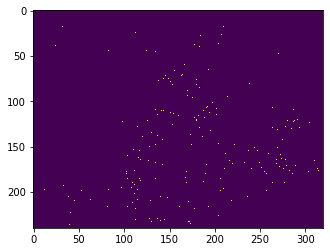

In [18]:
plt.imshow(f1.kp_map)

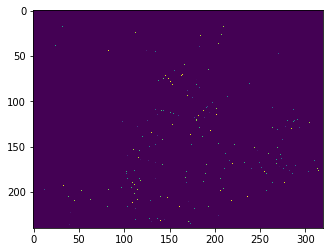

In [26]:
plt.imshow(f1.angle_map*100)

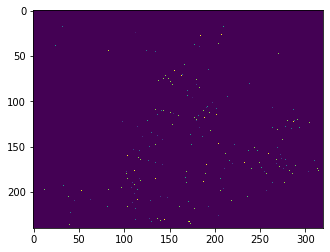

In [25]:
plt.imshow(f1.size_map*100)

In [8]:
sf = vid.superframes[6]
sf.frame_features

TypeError: 'NoneType' object is not subscriptable

In [ ]:
pd.DataFrame([sf.features],columns=sf.super_fnames)

In [ ]:
list(ff.std()[3:])

In [ ]:
plt.plot(range(vid.N),vid.gt)
for c in vid.cutlist:
    plt.axvline(x = c, color = 'r',alpha=0.5) 

In [ ]:
# show the image arrays
# fimgs = vid.frame_imgs
# for c in cutlist[1:]:
#     if c!=1:
#         plotseq(fimgs[c-3:min(c+5,len(fimgs))],c-3,c+4)

In [ ]:
vid.construct_frames()

In [ ]:
f = vid.frames[10]

In [ ]:
f.construct_features()

In [127]:
%load_ext autoreload
%autoreload
from utils import *
vname = 'Cooking'
sff = get_sff(vname)
ff = get_ff(vname)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


score  percentile  super_percentile   mean_sal  keypoints  kp_angle  \
0    0.000000     0.00000          0.000000   3.463529        652  0.698451   
1    0.000000     0.78125          0.071429   6.449362        747  0.853568   
2    0.000000     1.56250          0.142857  10.762305        693  0.791589   
3    0.000000     2.34375          0.214286   5.430521        640  0.684766   
4    0.000000     3.12500          0.285714  10.781562        549  0.598073   
..        ...         ...               ...        ...        ...       ...   
123  0.005348    96.09375          0.736842   4.827305        407  0.486497   
124  0.000000    96.87500          0.789474  18.503229        610  0.649023   
125  0.000000    97.65625          0.842105   2.469167        514  0.531771   
126  0.000000    98.43750          0.894737  14.606497        384  0.378984   
127  0.000000    99.21875          0.947368  57.097799        480  0.467057   

      kp_size        red       green        blue        gray  
0    0.024245  58.517396   92.829818  108.544206   93.581667  
1    0.028750  61.046940   93.614089  109.766888   94.694167  
2    0.024102  59.162734   90.967135  106.406289   91.927292  
3    0.024596  62.219206   94.730456  109.313867   95.346979  
4    0.022695  61.421823   94.974505  109.064076   95.332760  
..        ...        ...         ...         ...         ...  
123  0.020508  88.557891  105.763880  132.042109  111.630703  
124  0.023268  69.667396   85.313893  107.334635   90.086888  
125  0.023555  70.575312   87.538620  109.264805   92.072018  
126  0.016224  66.736615   80.805091   99.715339   84.817422  
127  0.017109  54.742435   65.550391   83.558529   69.678411  

[128 rows x 11 columns]

In [40]:
allvid = all_vid()

In [164]:
# choose testing set
import random
random.seed(1)
test_sf = random.choices(allvid,k=3)
# test_sf = []
train_sf = []
for v in allvid:
    if v not in test_sf:
        train_sf.append(v)

In [165]:
%load_ext autoreload
%autoreload 2
from utils import *
# super frame dataset
# test_xn,test_yn = prepare_normedsff(test_sf)
# train_xn,train_yn = prepare_normedsff(train_sf)
# test_x,test_y = prepare_sff(test_sf)
# train_x,train_y = prepare_sff(train_sf)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [274]:
# frame dataset
# test_xn,test_yn = prepare_normedff(test_sf)
train_xn,train_yn = prepare_normedff(train_sf)
train_xall,train_yall = prepare_normedff(allvid)

In [229]:
# load sklearn library
from sklearn.model_selection import train_test_split
from sklearn.base import clone 
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [230]:
# construct utility functions for the use of model evaluatation
# evaluate the model with splitted dataset
# from sklearn.metrics import mean_absolute_error
def get_score(model,features,labels):
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = mean_absolute_error(y_test, y_pred)
    return score
# evaluate the model with 3-folds cross validation 
def evaluate_model(model,features,labels):
    val_result = -cross_val_score(model,features,labels,cv=3,scoring='neg_mean_absolute_error')
    print(val_result)
    print(val_result.mean())
    return val_result

In [231]:
# model SVR
model = SVR(kernel='rbf',C=0.01)
# model.fit(train_x_normed,train_y)

In [232]:
evaluate_model(model,train_xn,train_yn)

[0.1172286  0.12167823 0.11124752]
0.11671811325944108


array([0.1172286 , 0.12167823, 0.11124752])

In [233]:
model.fit(train_xn,train_yn)
pred = model.predict(test_xn)

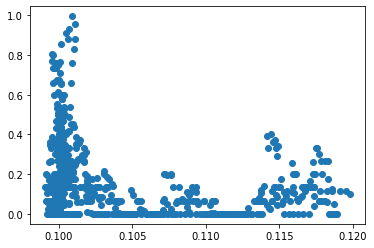

In [234]:
plt.plot(pred,test_yn,'o')

In [235]:
# mlp
model_mlp = MLPRegressor(random_state=0, max_iter=1000,activation='relu',hidden_layer_sizes=(100,100))

In [236]:
evaluate_model(model_mlp,train_xn,train_yn)

[0.12872431 0.13811461 0.16556665]
0.14413519244771358


array([0.12872431, 0.13811461, 0.16556665])

In [237]:
model_mlp.fit(train_xn,train_yn)
pred = model_mlp.predict(test_xn)

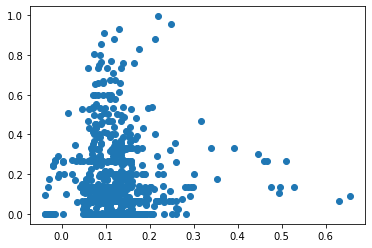

In [150]:
plt.plot(pred,test_yn,'o')

In [151]:
from sklearn.ensemble import RandomForestRegressor

In [266]:
# train_xn = train_xn.drop(['percentile'],axis=1)
model_rf = RandomForestRegressor(random_state=0,n_estimators=200)
evaluate_model(model_rf,train_xn,train_yn)

[0.095644   0.09602646 0.07100187]
0.08755744333643438


array([0.095644  , 0.09602646, 0.07100187])

In [267]:
model_rf.fit(train_xn,train_yn)
importances = list(model_rf.feature_importances_)
feature_names = list(train_xn.columns)
feature_importances = [(feature, round(importance*100, 2)) for feature, importance in zip(feature_names, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [249]:
names = [x[0] for x in feature_importances]
values = [x[1] for x in feature_importances]
plt.figure(figsize=(10,6))
plt.bar(names,values)
plt.xticks(rotation=90)
plt.xlabel('features',fontsize=15)
plt.ylabel('importance (%)',fontsize=13)

Text(0, 0.5, 'importance (%)')

In [259]:
# super frame dataset
train_xn_super,train_yn_super = prepare_normedsff(train_sf)
model_rf_super = RandomForestRegressor(random_state=0,n_estimators=200)
model_rf_super.fit(train_xn_super,train_yn_super)

RandomForestRegressor(n_estimators=200, random_state=0)

In [260]:
test_xn_super,test_yn_super = prepare_normedsff([test_sf[0]])
model_rf_super.predict(test_xn_super)

array([0.14555898, 0.14734456, 0.15049049, 0.09976104, 0.11383575,
       0.09272868, 0.11000517, 0.16446799])

In [250]:
test_sf
test_sf[0]

'Kids_playing_in_leaves'

In [268]:
x,y = prepare_normedff(['Cooking'])
x = x.drop(['percentile'],axis=1)
pred = model_rf.predict(x)
plt.plot(range(len(pred)),pred[::-1],range(len(pred)),y)

ValueError: Number of features of the model must match the input. Model n_features is 19 and input n_features is 9 

In [208]:
x,y = prepare_normedff([test_sf[1]])
x = x.drop(['percentile'],axis=1)
pred = model_rf.predict(x)
plt.plot(range(len(pred)),pred[::-1],range(len(pred)),y)

In [209]:
np.correlate(pred,y)

array([12.24403214])

In [212]:
# more analysis
vid = Video('Kids_playing_in_leaves')

loading frames ...
loading salient maps ...
get ground truth score ...
split super frames ...
(20, 815.8460899653978)
(66, 605.3494040753556)
(192, 1384.1530488273743)
(216, 1026.8244521337947)
(241, 531.846397539408)
(285, 604.5934332948866)
(308, 1598.287843137255)


In [214]:
vid.cutlist

[0, 20, 66, 192, 216, 241, 285, 308, 318]

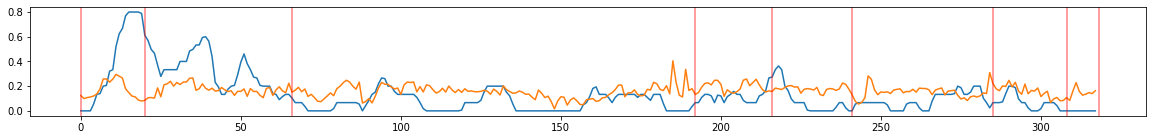

In [252]:
plt.figure(figsize=(20,2))
plt.plot(range(vid.N),vid.gt)
plt.plot(range(vid.N),pred)
for c in vid.cutlist:
    plt.axvline(x = c, color = 'r',alpha=0.5) 

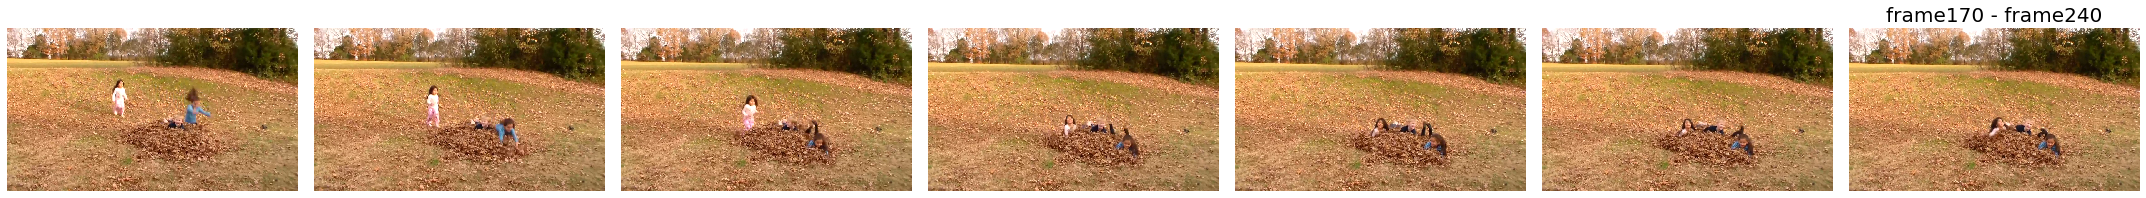

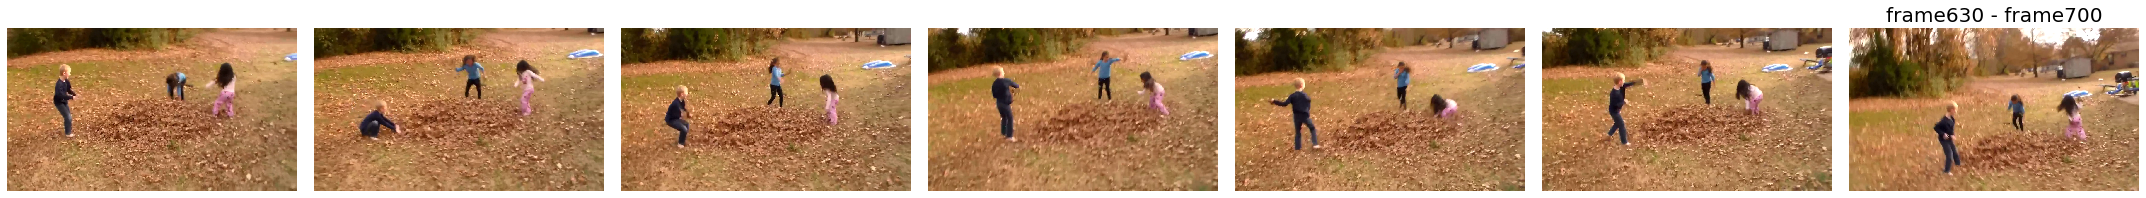

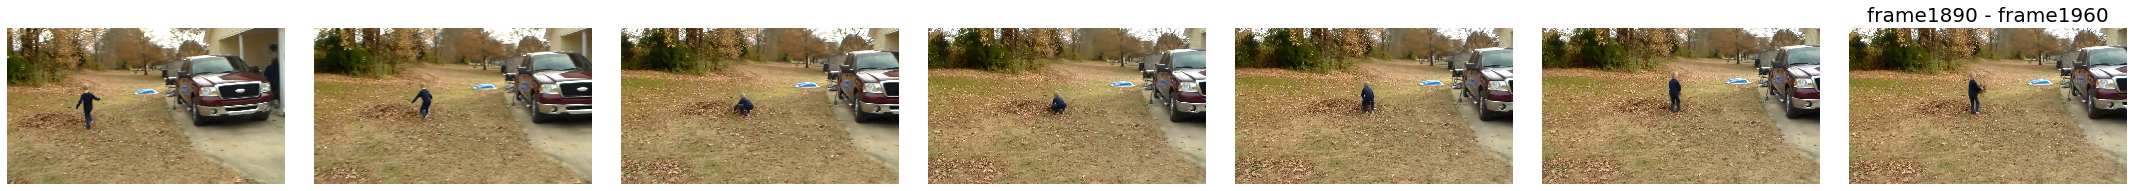

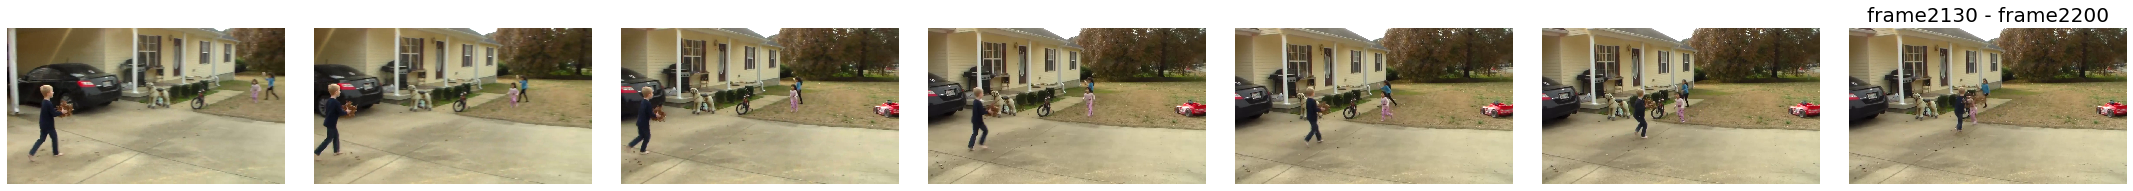

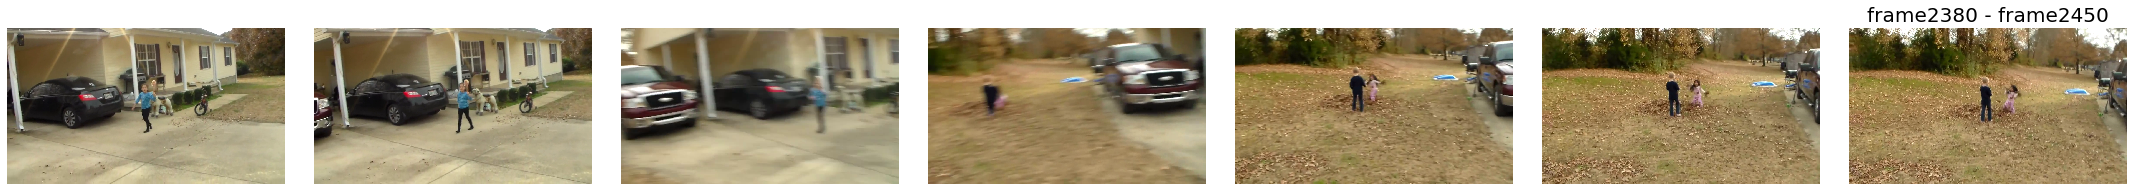

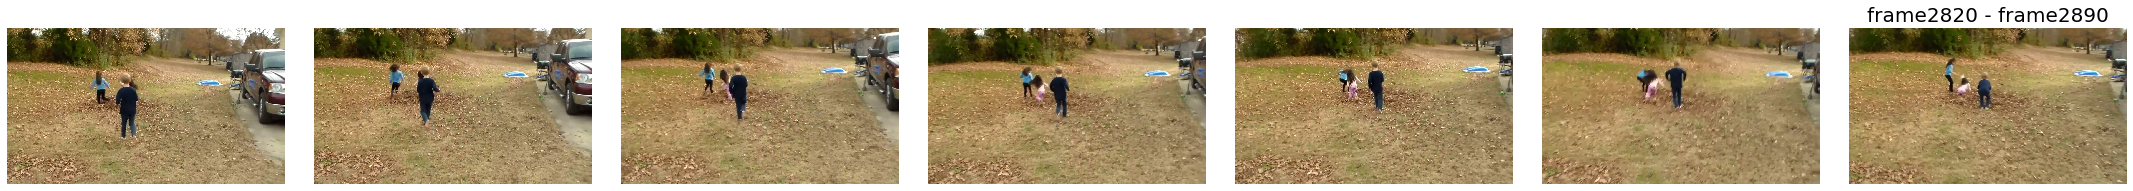

In [221]:
# show the image arrays
fimgs = vid.frame_imgs
for c in vid.cutlist[1:-1]:
    if c!=1:
        plotseq(fimgs[c-3:min(c+5,len(fimgs))],c-3,c+4)

In [273]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(pred,distance=100)
plt.figure(figsize=(20,2))
plt.plot(pred)
plt.plot(peaks, pred[peaks], "x")
plt.plot(range(vid.N),vid.gt)
plt.plot(range(vid.N),pred)
for c in vid.cutlist:
    plt.axvline(x = c, color = 'r',alpha=0.5) 

In [16]:
%load_ext autoreload
%autoreload
from Model import SuperFrameModel

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


NameError: name 'labels' is not defined